In [1]:
# Install the sentence_transformers package

In [11]:
%pip install sentence_transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.6 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=6c25e09fe0c5989a58e857f65c6f04c43724cec31884aa4e080bc3e5cbe75894
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [2]:
# Import necessary libraries

In [12]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch 
import os

In [3]:
# Load the CLIP-ViT-B-32 model

In [13]:
model = SentenceTransformer('clip-ViT-B-32')

In [4]:
# Download the dataset of photos

In [14]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

--2023-04-17 02:32:03--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1922426838 (1.8G) [application/zip]
Saving to: ‘unsplash-25k-photos.zip’

unsplash-25k-photos 100%[===================>]   1.79G  30.2MB/s    in 59s     

2023-04-17 02:33:02 (31.2 MB/s) - ‘unsplash-25k-photos.zip’ saved [1922426838/1922426838]



In [5]:
# Unzip the dataset of photos

In [15]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

Streaming output truncated to the last 5000 lines.
  inflating: photos/ErnD0oSB9OE.jpg  
  inflating: photos/CLMlVwtPsI4.jpg  
  inflating: photos/7by0hnrUBP8.jpg  
  inflating: photos/XWARm1Wgg4U.jpg  
  inflating: photos/m_x26CPIjic.jpg  
  inflating: photos/Or9vxPAGtXw.jpg  
  inflating: photos/asr62h5w66w.jpg  
  inflating: photos/oPubZ53L5OE.jpg  
  inflating: photos/AENmGl9JVgs.jpg  
  inflating: photos/kR1Aer8c_WI.jpg  
  inflating: photos/YCniL3n_B7Q.jpg  
  inflating: photos/pg5CVv0FEBU.jpg  
  inflating: photos/jynDaAkI0H8.jpg  
  inflating: photos/QP64OlGcfcQ.jpg  
  inflating: photos/a_nu2fRoqwI.jpg  
  inflating: photos/HeerZLfH4h8.jpg  
  inflating: photos/7TGVEgcTKlY.jpg  
  inflating: photos/fN2pzLWtG6A.jpg  
  inflating: photos/lpxXl5Ssung.jpg  
  inflating: photos/yan5Aj6crIU.jpg  
  inflating: photos/9Phn7Dwz2PM.jpg  
  inflating: photos/9TRaDtl7Z5U.jpg  
  inflating: photos/QeZuoNqtj9I.jpg  
  inflating: photos/lLUbQBbf6Bc.jpg  
  inflating: photos/rmFs3k34JLI.jpg  

In [6]:
# Get a list of image file names in the "photos" directory, and limit it to the first 5000

In [16]:
img_names = list(glob.glob('photos/*.jpg'))[:5000]
print(len(img_names))

5000


In [7]:
# Print the first five image file names

In [17]:
img_names[0:5]

['photos/l91ou8EAdrs.jpg',
 'photos/UeimXDBtv3M.jpg',
 'photos/YxCyGRM0xYU.jpg',
 'photos/rBYEbsJIwrY.jpg',
 'photos/wxrj0E0Sdgw.jpg']

In [18]:
# Open the first image to test if everything is working

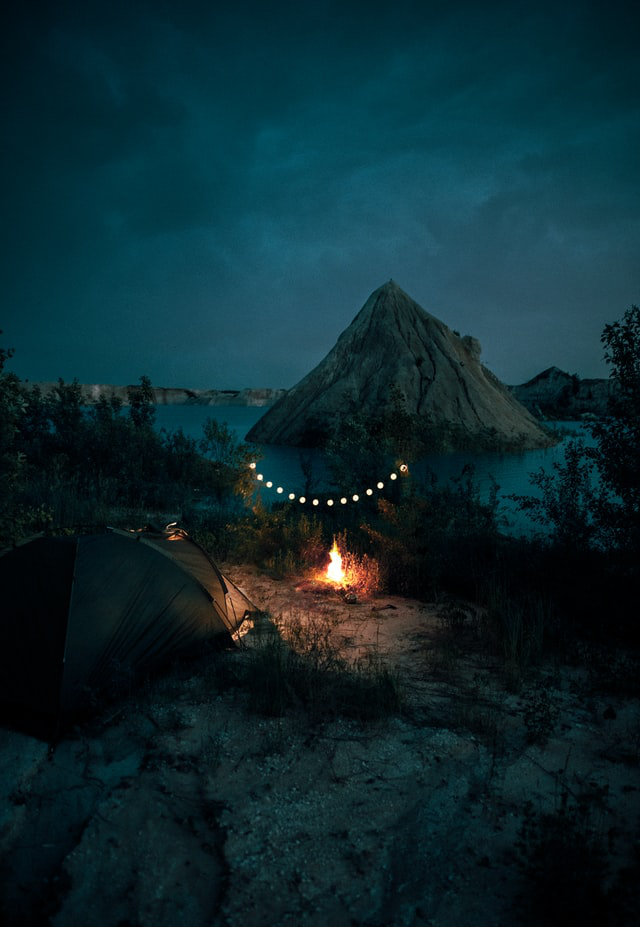

In [19]:
Image.open(img_names[0])


In [20]:
# Encode all the images into a single tensor using the model and show the progress bar

In [21]:
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [22]:
img_folder = '/photos'  #Set the image folder to '/photos'

def search(query, k=3):  #Define the search function
  query_emd = model.encode([query], convert_to_tensor=True, show_progress_bar=False)  #Encode the query using the model

#Perform semantic search to find similar images and get the hits
  hits = util.semantic_search(query_emd, img_embed, top_k=k)[0]  

  print(hits) 

# Print the query and the paths to the top k similar images
  print("Query: ", query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

# Open the image and show it
    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

In [23]:
#Call the search function and provide a query string. By default, it will return the top 3 most similar images.

[{'corpus_id': 2363, 'score': 0.2816354036331177}, {'corpus_id': 2535, 'score': 0.27865931391716003}, {'corpus_id': 1168, 'score': 0.27677446603775024}]
Query:  man with dog
photos/qwZYyxJCYtE.jpg


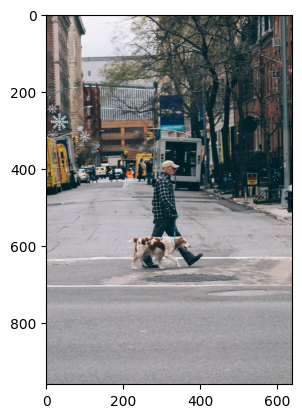

photos/OPAUTV_6n10.jpg


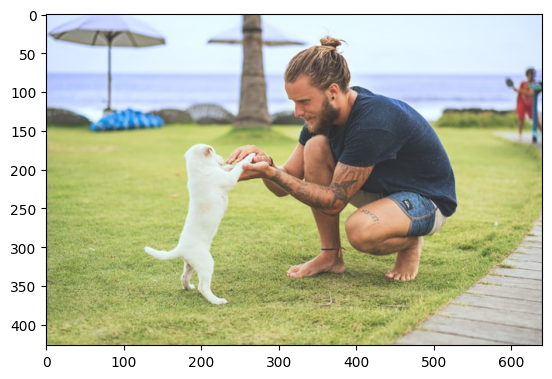

photos/yu6V2zc1eJo.jpg


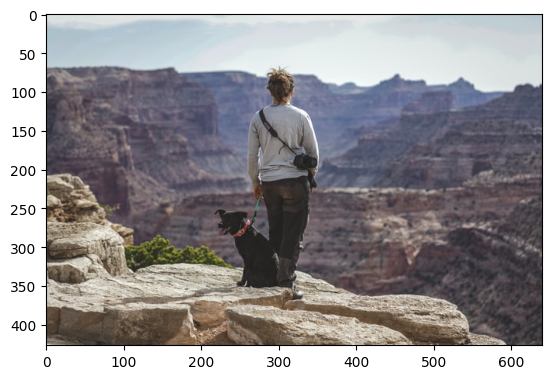

In [24]:
search('man with dog')

[{'corpus_id': 2088, 'score': 0.2812073230743408}, {'corpus_id': 1022, 'score': 0.2755546569824219}, {'corpus_id': 93, 'score': 0.27234527468681335}]
Query:  dogs in park
photos/1VgfQdCuX-4.jpg


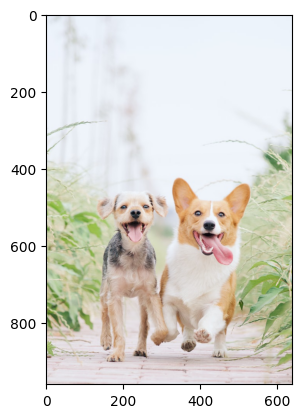

photos/2ixYuIJ83U4.jpg


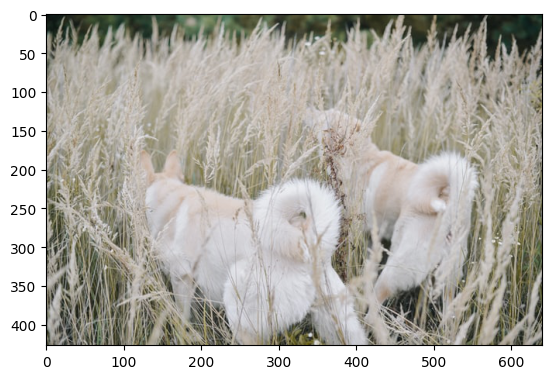

photos/q61hX065mSs.jpg


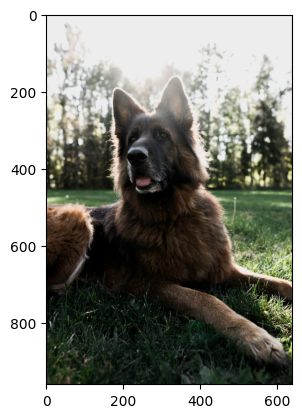

In [25]:
search('dogs in park')

[{'corpus_id': 3110, 'score': 0.29028311371803284}, {'corpus_id': 3250, 'score': 0.2881230115890503}, {'corpus_id': 4580, 'score': 0.2856651246547699}]
Query:  sunset
photos/3DsxYjhozPQ.jpg


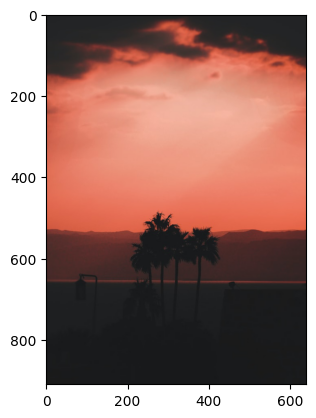

photos/PcLd-tMiheo.jpg


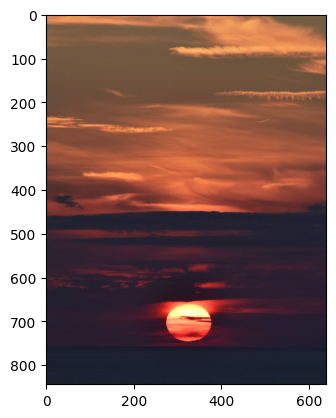

photos/o9nE1a7jhBQ.jpg


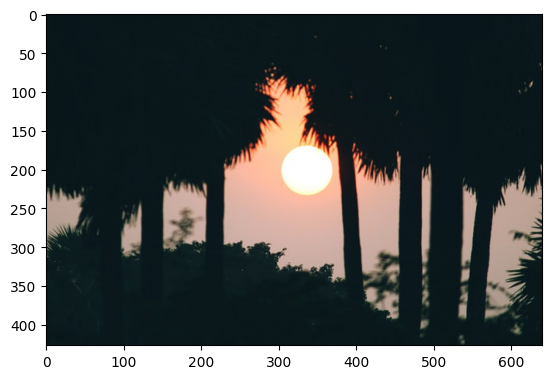

In [26]:
search('sunset')

[{'corpus_id': 1173, 'score': 0.29589641094207764}, {'corpus_id': 3033, 'score': 0.2934534549713135}, {'corpus_id': 2158, 'score': 0.29276832938194275}]
Query:  snowfall in canada
photos/Auewhfdwzj4.jpg


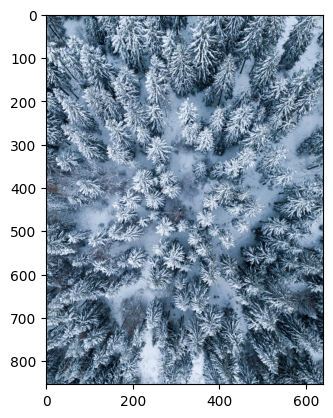

photos/USXfF_ONUGo.jpg


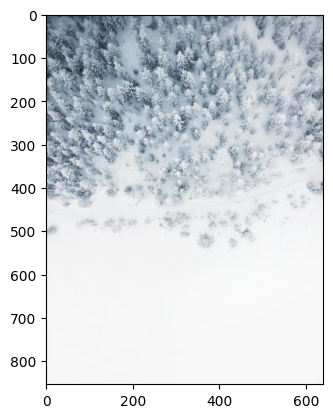

photos/ejAz1xfCyNM.jpg


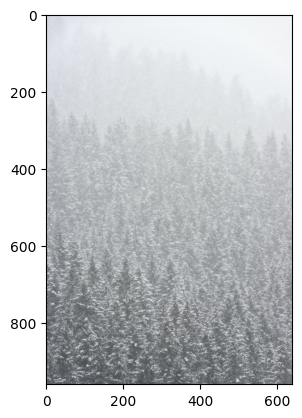

In [27]:
search('snowfall in canada')

[{'corpus_id': 1523, 'score': 0.29359403252601624}, {'corpus_id': 2301, 'score': 0.28196531534194946}, {'corpus_id': 4577, 'score': 0.2673039138317108}]
Query:  two cats
photos/P2iRe3Okd4U.jpg


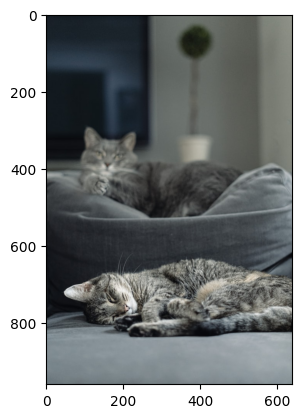

photos/0iNLhORjMGM.jpg


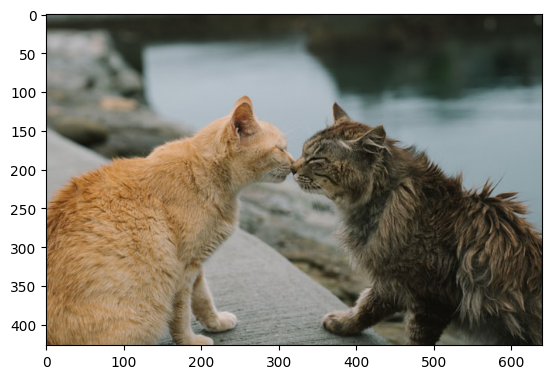

photos/C0zDWAPFT9A.jpg


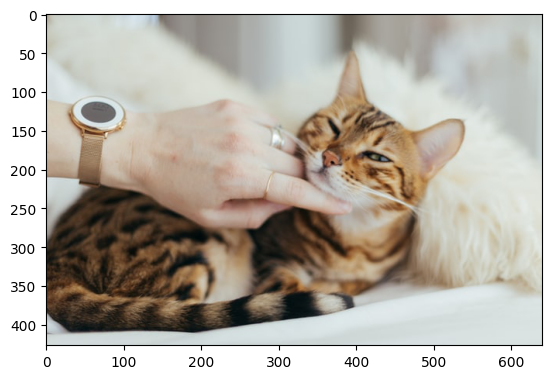

In [28]:
search('two cats')

#Finding images based of the image present in the sample dataset

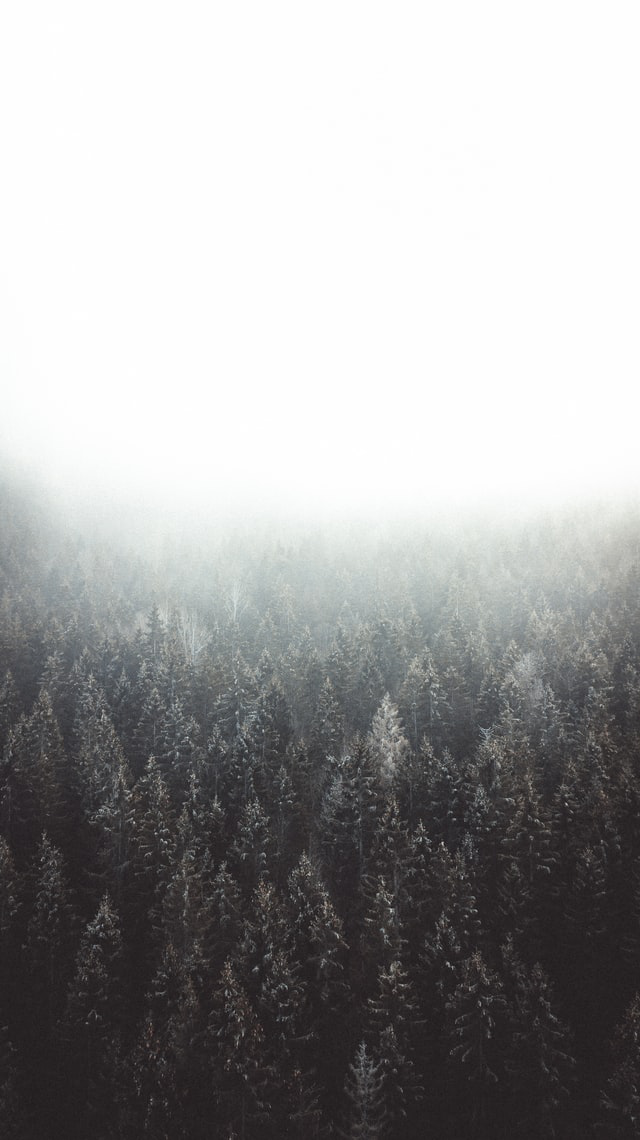

In [30]:
#img_names[121]
Image.open(img_names[121]) #opening image 121 from the sample dataset.

[{'corpus_id': 121, 'score': 0.9999999403953552}, {'corpus_id': 4992, 'score': 0.947726309299469}, {'corpus_id': 3303, 'score': 0.9383751153945923}]
Query:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x1140 at 0x7F1BF8052E20>
photos/zScN11MYJcQ.jpg


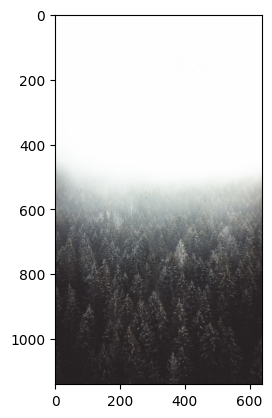

photos/0_vRmdJe3Qo.jpg


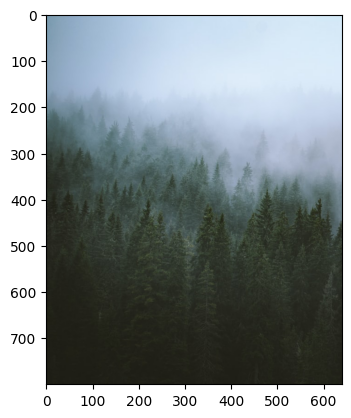

photos/wRaPah6fRn0.jpg


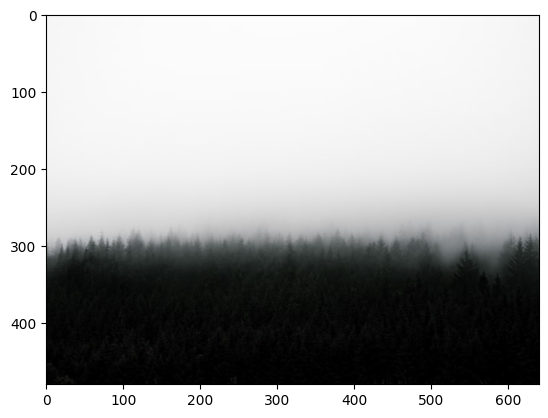

In [31]:
search(Image.open(img_names[121])) #searching images related to the image 121. 